As a project I replicated the paper from ICML about regressions with limited number of attributes that learner can observe. (https://icml.cc/2012/papers/433.pdf). I tried to achieve similar (or maybe better) results.  
The same as authors, I have implemented Ridge, Lasso and Support Vector Regression and used the MNIST dataset in experiments.  
I have also implemented the regression from https://arxiv.org/pdf/1004.4421.pdf (Algorithm 2), because they used it in experiments to compare.

Proposed regressions were benchmarked by distinguishing 3s from 5s from MNIST dataset. Authors decided to test algorithms by cross validation. In order to compare my implementations with their, I did the same. I also think that cross validation is a good idea, because these algorithms are randomized and one run of the algorithm is not enough.  
Loss function was mean squared error.

In all regression algorithms published in the paper, attributes are radomly picked in the same way. I have implemented it as a [function](#scrollTo=J9mIF77Cnsb6&line=3&uniqifier=1).  
It returns vector $a$, where: 
  \begin{equation}
  a_{i} = \left\{
    \begin{array}{ll}
      x_{i}\cdot d / k & \text{if } x_{i} \text{ is picked,}\\
     0 & \text{if } x_{i} \text{ is not picked.}
    \end{array} \right.
  \end{equation}
where $d$ is the total number of attributes and $k$ is the number of attributes to observe.  
It took me a while to figure out why they multiplicate $x_{i}$ by $d / k$, but from other papers I found out that $a$ is an unbiased estimator of vector $x$. The pseudocode suggests that the attributes can be chosen with replacement, but with no replacement results of regressions are slightly better. 

#Ridge Regression
I have implemented Ridge Regression with gradient descent method (Algorithm 1 from the paper). It has two parameters: $B$ and $\eta$.  
Instead of minimalizing $W^{T}W$, authors decided to limit $||W||_{2}^{2}$ by $B$.  
$W^{T}W$ equals to $||W||_{2}^{2}$ if $W$ is a column vector.  
$\eta$ is a learning rate.  
[Implementation](#scrollTo=Lf_mloA-Tslk)  
Note that algorithm is observing $k+1$ attributes. The last one is in computing the value of theta.

I was trying to find the best values for parameters $B$ and $\eta$. I decided to put 56 as $k$, because experiments in paper has shown that 56 attributes are enough to give satisfactory results.  
First I used logarithmic spaces to know first estimation of these arguments. Then I used linear spaces.  
[Experiments and all results](#scrollTo=bWhZR9JRzuXI&line=3&uniqifier=1)

The least error was 0.72942, for $B$ = 0.327778, $\eta$ = 0.000032.  
The results are not satisfactory. Their experiments gave means squared error about 0.3, my implementation is more than 2 times worse.  
I didn't understand why they were returning the mean of regressors from all previous iterations. I think that this is a mistake, so I decided to return the last regressor.  
[Code](#scrollTo=svwxckt1erRU)  
Then I was trying to find the best parameters, in the same way as before.  
[Experiments](#scrollTo=kzBX9SwDe4Xm&line=2&uniqifier=1)

The least error was 0.568237, for $B$ = 0.34, $\eta$ = 0.000016.
It is better than the results from the previous implementation. As I thought, it's better to return the last regressor.

I took a look at the returned vector. Elements corresponding to more important pixels should have higher value. [Vector elements as images](#scrollTo=FNFPsbZflgC_&line=3&uniqifier=1)  
Most of them have a white spot in the center. It looks like it's hard to distinguish between 3s and 5s by these pixels.

I compared the results with [Ridge Regression from sklearn](#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) and they were much better. With default parameters it gave error 0.248. They are similar to the ones from experiments, where authors allowed to observe all attributes. I was hoping that they will be worse and it would be meaning that authors had other (larger) version of MNIST dataset or they calculated errors in a different way.

#Lasso Regression
Implementation of Lasso regression published in paper (Algorithm 2) includes picking arguments in the same way as in Ridge Regression. Similar to before, authors decided to limit $||W||_{1}$ by $B$, not to minimalize it. They also used [exponentiated gradient method](#https://users.soe.ucsc.edu/~manfred/pubs/J36.pdf).  
[Code](#scrollTo=_a4_TzDJ11p3&line=7&uniqifier=1)

First I was trying to find the best values for $B$ and $\eta$ in the same way as in Ridge regression. Here I put 4 as $k$, because results of experiments attached in paper have shown that it be enough.  
[Experiments](#scrollTo=20ZbIeNbOawR)

The [results](#scrollTo=LCKOYci7-Csf) surprised me. I was expecting that there will be only one local minimum. It looks like $B$ has to be small and the larger $\eta$ the better will be results or $\eta$ has to be small and $B$ has to be large. 

Found minimal error was 0.744, for $B$ = 890 and $\eta$ = 0.00001. It is far from the results of authors of paper.  
Let's look at the [Lasso Regression from sklearn](#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).

Alpha (one of the parameters) is a constant that multiplies 1st norm of regressor in objective function. Its default value is 1, and with it the results are not satisfactory (0.996).  
For alpha = 0.1 gave mean squared error 0.585. It seems that the optimal regressor is having large coefficients.  
It explains why $B$ in previous function also had to be large.  
The results are much worse from the ones from Ridge Regression, the same as in paper. 

#Other regressions
I have also implemented the regression from https://arxiv.org/pdf/1004.4421.pdf (Algorithm 2), because they used it in experiments to compare.  
[Implementation](#scrollTo=Tah2r_swY3Rm)  
The [results](#scrollTo=cp3v-io2-Gs8) are worse than the ones from Lasso Regression(error = 0.822), the same have shown their experiments.

I have also implemented Support Vector Regression from the paper. I haven't found appropriate paramters yet.  
[Implementation](#scrollTo=9H37rI42UC_K&line=2&uniqifier=1)

#Conclusions
The results of experiments are not satisfactory and far from the ones from the paper. I have looked for the bugs, misspellings, etc and searched for an answers in other papers. In my opinion the proposed algorithms do not work as well as authors have shown. For example (as I said before) in Ridge Regression they were returning the mean of all regressors instead of the last regressor. I treat it as a mistake. They also allowed to initialize the initial regressor arbitrarily and maybe there are much better initialization values than mine. I think it is worth to check out.  
In pseudocode of Lasso Regression they always divided by 0 in the first iteration. I think that they decided to not handle this case in order to keep code clean and more readable. But maybe that case should be handled in other way than I did.  

In [0]:
![ -e mnist.npz ] || gdown 'https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU' -O mnist.npz

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn.linear_model

In [0]:
with np.load('mnist.npz') as mnist:
    data = np.vstack((mnist['train_data'], mnist['test_data']))
    labels = np.hstack((mnist['train_labels'], mnist['test_labels']))

    indices_3v5 = (labels == 3) | (labels == 5)
    data = (data[indices_3v5].astype('float32').reshape(-1, 28*28) - 127) / 256
    labels = labels[indices_3v5]
    labels[labels == 3] = -1
    labels[labels == 5] = 1

    rand_perm = np.random.permutation(labels.shape[0])
    data = data[rand_perm]
    labels = labels[rand_perm]

In [0]:
def get_train_test_cross_validation(data, labels, k, i):
    part_length = data.shape[0] // k
    train_indices1, test_indices, train_indices2 = np.split(np.arange(data.shape[0]),
                                                            [i * part_length,
                                                             (i + 1) * part_length])
    train_indices = np.hstack((train_indices1, train_indices2))
    return (data[train_indices], labels[train_indices],
            data[test_indices], labels[test_indices])

In [0]:
def observe_k_attributes(x, k):
    d = len(x)
    observed_attributes = np.zeros(d)
    observed_attributes[np.random.permutation(d)[:k]] = 1.0 * d / k
    observed_attributes *= x
    return observed_attributes

In [0]:
def attribute_efficient_ridge_regression(X, Y, k, B, eta):
    m = X.shape[0]
    d = X.shape[1]
    W_result = np.zeros(d)
    W = np.full(d, np.sqrt(B / (2 * d)))
    for t in range(m):
        observed_attributes = observe_k_attributes(X[t], k)

        current_W_squared = W ** 2
        chosen_index = np.random.choice(d, p=(current_W_squared / current_W_squared.sum()))
        
        theta = current_W_squared.sum() * X[t][chosen_index] / W[chosen_index] - Y[t]
        g = theta * observed_attributes
        v = W - eta * g

        W_result += W / m
        W = v * B / max(np.sqrt((v ** 2).sum()), B)
    return W_result

In [0]:
results_ridge_logspace = []
k = 56

for i in range(10):
    train_data, train_labels, test_data, test_labels = get_train_test_cross_validation(data, labels,
                                                                                       10, i)
    for B in np.logspace(-7, 2, num=10):
        for eta in np.logspace(-8, 1, num=10):
            Ws = attribute_efficient_ridge_regression(train_data, train_labels, k, B, eta)
            found_labels = test_data @ Ws
            error = ((found_labels - test_labels) ** 2).mean()
            results_ridge_logspace.append({'B': B,
                                           'eta': eta,
                                           'part': i,
                                           'error': error})

results_ridge_logspace_df = pd.DataFrame(results_ridge_logspace)
results_ridge_logspace_df.head()

,B,eta,part,error
0,1.000000e-07,1.000000e-08,0,1.0
1,1.000000e-07,1.000000e-07,0,1.0
2,1.000000e-07,1.000000e-06,0,1.0
3,1.000000e-07,1.000000e-05,0,1.0
4,1.000000e-07,1.000000e-04,0,1.0


In [0]:
mean_res = results_ridge_logspace_df.groupby(['B', 'eta'])['error'].mean().reset_index()
mean_res

,B,eta,error
0,1.000000e-07,1.000000e-08,1.000000
1,1.000000e-07,1.000000e-07,1.000000
2,1.000000e-07,1.000000e-06,1.000000
3,1.000000e-07,1.000000e-05,1.000000
4,1.000000e-07,1.000000e-04,1.000000
...,...,...,...
95,1.000000e+02,1.000000e-03,25.358099
96,1.000000e+02,1.000000e-02,4.977993
97,1.000000e+02,1.000000e-01,1.464319
98,1.000000e+02,1.000000e+00,1.475605


Some values can be much larger than the minimum, so I used the logaritmic scale even in error axis.

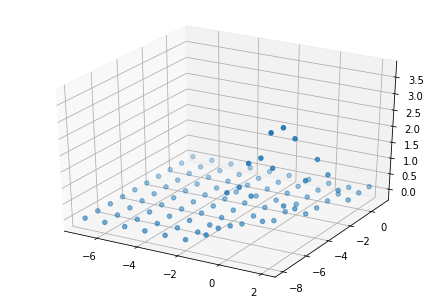

In [0]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(np.log10(mean_res.B), np.log10(mean_res.eta), np.log10(mean_res.error))
plt.show()

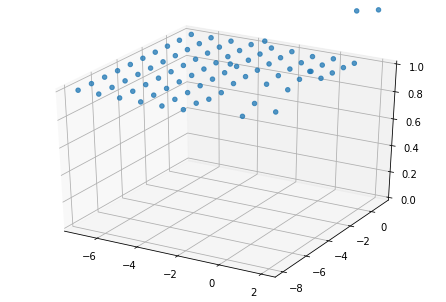

In [0]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_zlim3d(0, 1)
ax.scatter(np.log10(mean_res.B), np.log10(mean_res.eta), mean_res.error)
plt.show()

In [0]:
print(mean_res[mean_res.error == mean_res.error.min()])

      B      eta     error
63  0.1  0.00001  0.838461


Now I use the linear scale to find the best parameters. These values should be between adjacent values of minimum found previously on logaritmhic scale. 

In [0]:
results_ridge_linspace = []
k = 56

for i in range(10):
    print(i)
    train_data, train_labels, test_data, test_labels = get_train_test_cross_validation(data, labels,
                                                                                       10, i)
    for B in np.linspace(1e-2, 1., num=10):
        for eta in np.linspace(1e-6, 1e-4, num=10):
            Ws = attribute_efficient_ridge_regression(train_data, train_labels, k, B, eta)
            found_labels = test_data @ Ws
            error = ((found_labels - test_labels) ** 2).mean()
            results_ridge_linspace.append({'B': B,
                                           'eta': eta,
                                           'part': i,
                                           'error': error})

results_ridge_linspace_df = pd.DataFrame(results_ridge_linspace)

In [0]:
mean_res = results_ridge_linspace_df.groupby(['B', 'eta'])['error'].mean().reset_index()
mean_res

,B,eta,error
0,0.01,0.000001,0.978505
1,0.01,0.000012,0.978981
2,0.01,0.000023,0.984803
3,0.01,0.000034,0.988392
4,0.01,0.000045,0.990601
...,...,...,...
95,1.00,0.000056,0.803218
96,1.00,0.000067,0.821891
97,1.00,0.000078,0.831098
98,1.00,0.000089,0.836117


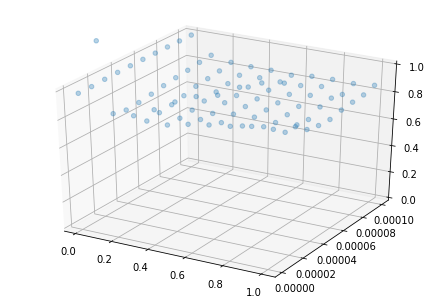

In [0]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_zlim3d(0, 1)
ax.scatter(mean_res.B, mean_res.eta, mean_res.error)
plt.show()

In [0]:
print(mean_res[mean_res.error == mean_res.error.min()])

       B       eta     error
32  0.34  0.000023  0.741008


In [0]:
_, B_step = np.linspace(1e-2, 1., num=10, retstep=True)
_, eta_step = np.linspace(1e-6, 1e-4, num=10, retstep=True)
B_start = 0.34 - B_step
B_end = 0.34 + B_step
eta_start = 0.000023 - eta_step
eta_end = 0.000023 + eta_step

In [0]:
results_ridge_linspace = []
k = 56

for i in range(10):
    print(i)
    train_data, train_labels, test_data, test_labels = get_train_test_cross_validation(data, labels,
                                                                                       10, i)
    for B in np.linspace(B_start, B_end, num=10):
        for eta in np.linspace(eta_start, eta_end, num=10):
            Ws = attribute_efficient_ridge_regression(train_data, train_labels, k, B, eta)
            found_labels = test_data @ Ws
            error = ((found_labels - test_labels) ** 2).mean()
            results_ridge_linspace.append({'B': B,
                                           'eta': eta,
                                           'part': i,
                                           'error': error})

results_ridge_linspace_df = pd.DataFrame(results_ridge_linspace)

In [0]:
mean_res = results_ridge_linspace_df.groupby(['B', 'eta'])['error'].mean().reset_index()
print(mean_res[mean_res.error == mean_res.error.min()])

           B       eta    error
48  0.327778  0.000032  0.72942


In [0]:
def my_attribute_efficient_ridge_regression(X, Y, k, B, eta):
    m = X.shape[0]
    d = X.shape[1]
    W_result = np.zeros(d)
    W = np.full(d, np.sqrt(B / (2 * d)))
    for t in range(m):
        observed_attributes = observe_k_attributes(X[t], k)

        current_W_squared = W ** 2
        chosen_index = np.random.choice(d, p=(current_W_squared / current_W_squared.sum()))
        
        theta = current_W_squared.sum() * X[t][chosen_index] / W[chosen_index] - Y[t]
        g = theta * observed_attributes
        v = W - eta * g

        W_result += W / m
        W = v * B / max(np.sqrt((v ** 2).sum()), B)
    return W

In [0]:
results_my_ridge_logspace = []
k = 56

for i in range(10):
    print(i)
    train_data, train_labels, test_data, test_labels = get_train_test_cross_validation(data, labels,
                                                                                       10, i)
    for B in np.logspace(-4, 2, num=7):
        for eta in np.logspace(-7, 1, num=9):
            Ws = my_attribute_efficient_ridge_regression(train_data, train_labels, k, B, eta)
            found_labels = test_data @ Ws
            error = ((found_labels - test_labels) ** 2).mean()
            results_my_ridge_logspace.append({'B': B,
                                              'eta': eta,
                                              'part': i,
                                              'error': error})

results_my_ridge_logspace_df = pd.DataFrame(results_my_ridge_logspace)
results_my_ridge_logspace_df.head()

0
1
2
3
4
5
6
7
8
9


,B,eta,part,error
0,0.0001,1.000000e-07,0,0.999772
1,0.0001,1.000000e-06,0,0.999866
2,0.0001,1.000000e-05,0,0.999934
3,0.0001,1.000000e-04,0,0.999954
4,0.0001,1.000000e-03,0,0.999936


In [0]:
mean_res = results_my_ridge_logspace_df.groupby(['B', 'eta'])['error'].mean().reset_index()
mean_res

,B,eta,error
0,0.0001,1.000000e-07,0.999772
1,0.0001,1.000000e-06,0.999889
2,0.0001,1.000000e-05,0.999955
3,0.0001,1.000000e-04,0.999963
4,0.0001,1.000000e-03,0.999962
...,...,...,...
58,100.0000,1.000000e-03,21740.662406
59,100.0000,1.000000e-02,37092.547609
60,100.0000,1.000000e-01,53391.914943
61,100.0000,1.000000e+00,62546.155508


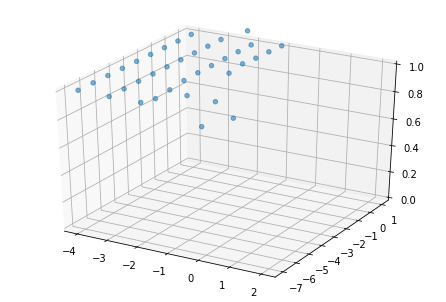

In [0]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_zlim3d(0, 1)
ax.scatter(np.log10(mean_res.B), np.log10(mean_res.eta), mean_res.error)
plt.show()

In [0]:
print(mean_res[mean_res.error == mean_res.error.min()])

      B      eta     error
29  0.1  0.00001  0.759046


In [0]:
results_my_ridge_linspace = []
k = 56

for i in range(10):
    print(i)
    train_data, train_labels, test_data, test_labels = get_train_test_cross_validation(data, labels,
                                                                                       10, i)
    for B in np.linspace(1e-2, 1., num=10):
        for eta in np.linspace(1e-6, 1e-4, num=10):
            Ws = my_attribute_efficient_ridge_regression(train_data, train_labels, k, B, eta)
            found_labels = test_data @ Ws
            error = ((found_labels - test_labels) ** 2).mean()
            results_my_ridge_linspace.append({'B': B,
                                           'eta': eta,
                                           'part': i,
                                           'error': error})

results_my_ridge_linspace_df = pd.DataFrame(results_my_ridge_linspace)

In [0]:
mean_res = results_my_ridge_linspace_df.groupby(['B', 'eta'])['error'].mean().reset_index()

In [0]:
print(mean_res[mean_res.error == mean_res.error.min()])

       B       eta     error
21  0.23  0.000012  0.626497


In [0]:
_, B_step = np.linspace(1e-2, 1., num=10, retstep=True)
_, eta_step = np.linspace(1e-6, 1e-4, num=10, retstep=True)
B_start = 0.23 - B_step
B_end = 0.23 + B_step
eta_start = 0.000012 - eta_step
eta_end = 0.000012 + eta_step

In [0]:
results_my_ridge_linspace = []
k = 56

for i in range(10):
    print(i)
    train_data, train_labels, test_data, test_labels = get_train_test_cross_validation(data, labels,
                                                                                       10, i)
    for B in np.linspace(B_start, B_end, num=10):
        for eta in np.linspace(eta_start, eta_end, num=10):
            Ws = my_attribute_efficient_ridge_regression(train_data, train_labels, k, B, eta)
            found_labels = test_data @ Ws
            error = ((found_labels - test_labels) ** 2).mean()
            results_my_ridge_linspace.append({'B': B,
                                           'eta': eta,
                                           'part': i,
                                           'error': error})

results_my_ridge_linspace_df = pd.DataFrame(results_my_ridge_linspace)
mean_res = results_my_ridge_linspace_df.groupby(['B', 'eta'])['error'].mean().reset_index()

In [0]:
print(mean_res[mean_res.error == mean_res.error.min()])

       B       eta     error
96  0.34  0.000016  0.568237


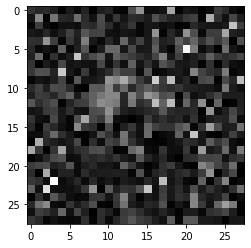

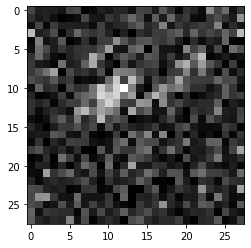

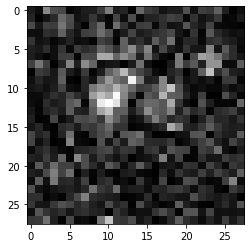

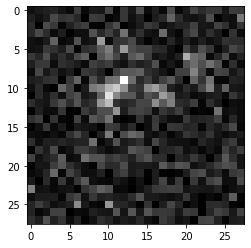

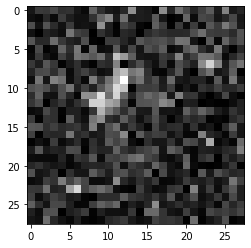

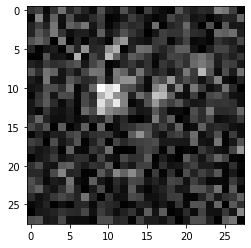

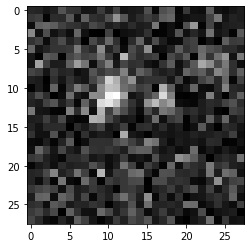

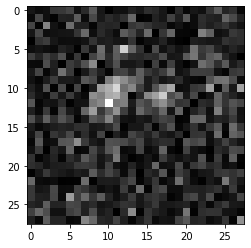

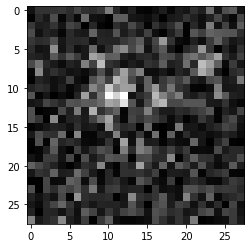

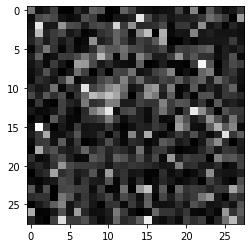

In [0]:
for i in range(10):
    train_data, train_labels, test_data, test_labels = get_train_test_cross_validation(data, labels,
                                                                                   10, i)
    Ws = my_attribute_efficient_ridge_regression(train_data, train_labels, 56, 0.34, 0.000016)
    plt.imshow(np.abs(Ws).reshape(28, 28), cmap="gray")
    plt.show()

In [0]:
sklearn_ridge = sklearn.linear_model.Ridge()
error = 0.
for i in range(10):
    train_data, train_labels, test_data, test_labels = get_train_test_cross_validation(data, labels,
                                                                                       10, i)
    sklearn_ridge.fit(train_data, train_labels)
    error += ((sklearn_ridge.predict(test_data) - test_labels) ** 2).mean() / 10
print(error)

0.2483881295023711


In [0]:
def attribute_efficient_lasso_regression(X, Y, k, B, eta):
    m = X.shape[0]
    d = X.shape[1]
    Z_plus = np.ones(d)
    Z_minus = np.ones(d)
    W_result = np.zeros(d)
    for t in range(m):
        W = (Z_plus - Z_minus) * B / (np.linalg.norm(Z_plus, 1) + np.linalg.norm(Z_minus, 1))
        observed_attributes = observe_k_attributes(X[t], k)
        
        if np.linalg.norm(W, 1) == 0:
            probabilities = np.full(d, 1. / d)
        else:
            probabilities = np.abs(W) / np.linalg.norm(W, 1)
        
        chosen_index = np.random.choice(d, p=probabilities)
        
        theta = np.linalg.norm(W, 1) * np.sign(W[chosen_index]) * X[t][chosen_index] - Y[t]
        g = theta * observed_attributes

        g = np.clip(g, -1 / eta, 1 / eta)
        Z_plus *= np.exp(-eta * g)
        Z_minus *= np.exp(eta * g)
        W_result += W / m
    return W_result


In [0]:
results_lasso_logspace = []
k = 4

for i in range(10):
    print(i)
    train_data, train_labels, test_data, test_labels = get_train_test_cross_validation(data, labels,
                                                                                       10, i)
    for B in np.logspace(-5, 4, num=10):
        for eta in np.logspace(-6, 2, num=9):
            Ws = attribute_efficient_lasso_regression(train_data, train_labels, k, B, eta)
            found_labels = test_data @ Ws
            error = ((found_labels - test_labels) ** 2).mean()
            results_lasso_logspace.append({'B': B,
                                           'eta': eta,
                                           'part': i,
                                           'error': error})

results_lasso_logspace_df = pd.DataFrame(results_lasso_logspace)

In [0]:
mean_res = results_lasso_logspace_df.groupby(['B', 'eta'])['error'].mean().reset_index()
mean_res

,B,eta,error
0,0.00001,0.000001,1.000000
1,0.00001,0.000010,1.000000
2,0.00001,0.000100,1.000000
3,0.00001,0.001000,0.999999
4,0.00001,0.010000,0.999998
...,...,...,...
85,10000.00000,0.010000,175133.555823
86,10000.00000,0.100000,176026.715665
87,10000.00000,1.000000,167036.033426
88,10000.00000,10.000000,155885.022311


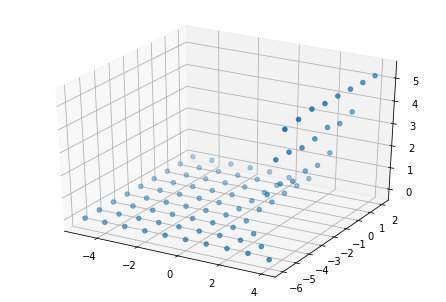

In [0]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(np.log10(mean_res.B), np.log10(mean_res.eta), np.log10(mean_res.error))
plt.show()

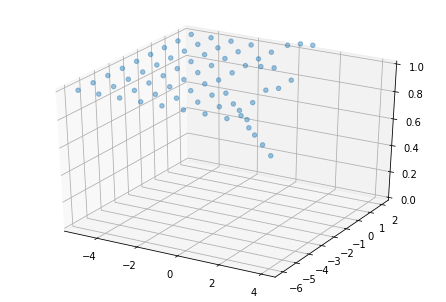

In [0]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_zlim3d(0, 1)
ax.scatter(np.log10(mean_res.B), np.log10(mean_res.eta), mean_res.error)
plt.show()

In [0]:
print(mean_res[mean_res.error == mean_res.error.min()])

        B     eta    error
65  100.0  0.0001  0.77084


In [0]:
results_lasso_linspace = []
k = 4

for i in range(10):
    print(i)
    train_data, train_labels, test_data, test_labels = get_train_test_cross_validation(data, labels,
                                                                                       10, i)
    for B in np.linspace(10, 1000, num=10):
        for eta in np.linspace(1e-5, 1e-3, num=10):
            Ws = attribute_efficient_lasso_regression(train_data, train_labels, k, B, eta)
            found_labels = test_data @ Ws
            error = ((found_labels - test_labels) ** 2).mean()
            results_lasso_linspace.append({'B': B,
                                           'eta': eta,
                                           'part': i,
                                           'error': error})

results_lasso_linspace_df = pd.DataFrame(results_lasso_linspace)
mean_res = results_lasso_linspace_df.groupby(['B', 'eta'])['error'].mean().reset_index()

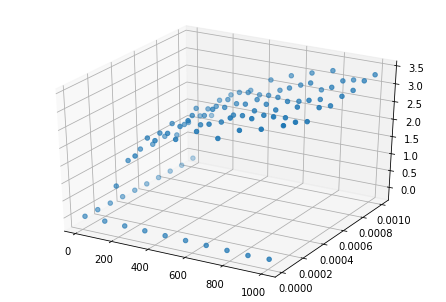

In [0]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(mean_res.B, mean_res.eta, np.log10(mean_res.error))
plt.show()

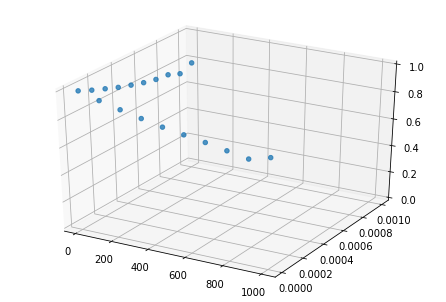

In [0]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_zlim3d(0, 1)
ax.scatter(mean_res.B, mean_res.eta, mean_res.error)
plt.show()

In [0]:
print(mean_res[mean_res.error == mean_res.error.min()])

        B      eta     error
80  890.0  0.00001  0.744874


In [0]:
sklearn_lasso = sklearn.linear_model.Lasso(alpha=1)
error = 0.
for i in range(10):
    train_data, train_labels, test_data, test_labels = get_train_test_cross_validation(data, labels,
                                                                                       10, i)
    sklearn_lasso.fit(train_data, train_labels)
    error += ((sklearn_lasso.predict(test_data) - test_labels) ** 2).mean() / 10
print(error)

0.9963628895470643


In [0]:
sklearn_lasso = sklearn.linear_model.Lasso(alpha=0.1)
error = 0.
for i in range(10):
    train_data, train_labels, test_data, test_labels = get_train_test_cross_validation(data, labels,
                                                                                       10, i)
    sklearn_lasso.fit(train_data, train_labels)
    error += ((sklearn_lasso.predict(test_data) - test_labels) ** 2).mean() / 10
print(error)

0.5858770852509455


In [0]:
def attribute_efficient_regression(X, Y, k, B, _lambda):
    m = X.shape[0]
    d = X.shape[1]
    W = np.ones(d)
    W_result = np.zeros(d)
    for t in range(m):
        observed_attributes = observe_k_attributes(X[t], k // 2)
        if np.abs(W).sum() == 0:
            probabilities = None
        else:
            probabilities = np.abs(W) / np.abs(W).sum()
        try:
            chosen_indices = np.random.choice(d, size=(k // 2), replace=False, p=probabilities)
        except ValueError:
            probabilities += 1. / d
            probabilities /= probabilities.sum()
            chosen_indices = np.random.choice(d, size=(k // 2), replace=False, p=probabilities)
        y = (2. / k * np.sign(W[chosen_indices]) * np.abs(W).sum() * X[t][chosen_indices]).sum()
        
        W = (1 - 1. / (t + 1)) * W - 2 / (_lambda * (t + 1)) * (y - Y[t]) * observed_attributes
        W = W * B / max(np.sqrt((W ** 2).sum()), B)

        W_result += W / m
    return W_result

In [0]:
results_aer_logspace = []
k = 4

for i in range(10):
    print(i)
    train_data, train_labels, test_data, test_labels = get_train_test_cross_validation(data, labels,
                                                                                       10, i)
    for B in np.logspace(-5, 4, num=10):
        for eta in np.logspace(-6, 1, num=8):
            Ws = attribute_efficient_regression(train_data, train_labels, k, B, eta)
            found_labels = test_data @ Ws
            error = ((found_labels - test_labels) ** 2).mean()
            results_aer_logspace.append({'B': B,
                                         'eta': eta,
                                         'part': i,
                                         'error': error})

results_aer_logspace_df = pd.DataFrame(results_aer_logspace)

In [0]:
mean_res = results_aer_logspace_df.groupby(['B', 'eta'])['error'].mean().reset_index()
mean_res

,B,eta,error
0,0.00001,0.000001,1.000000
1,0.00001,0.000010,1.000000
2,0.00001,0.000100,1.000000
3,0.00001,0.001000,1.000000
4,0.00001,0.010000,1.000000
...,...,...,...
75,10000.00000,0.001000,1498.601878
76,10000.00000,0.010000,2593.756249
77,10000.00000,0.100000,7743.336251
78,10000.00000,1.000000,67624.847677


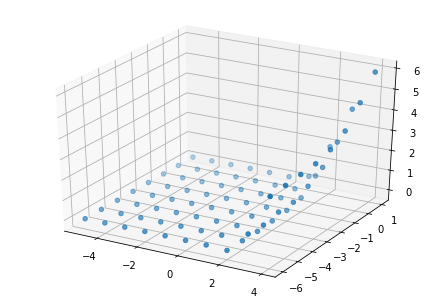

In [0]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(np.log10(mean_res.B), np.log10(mean_res.eta), np.log10(mean_res.error))
plt.show()

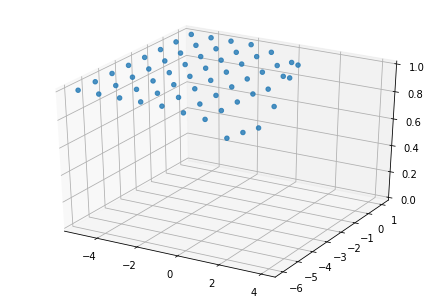

In [0]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_zlim3d(0, 1)
ax.scatter(np.log10(mean_res.B), np.log10(mean_res.eta), mean_res.error)
plt.show()

In [0]:
print(mean_res[mean_res.error == mean_res.error.min()])

        B     eta     error
58  100.0  0.0001  0.805055


In [0]:
results_aer_linspace = []
k = 4

for i in range(10):
    print(i)
    train_data, train_labels, test_data, test_labels = get_train_test_cross_validation(data, labels,
                                                                                       10, i)
    for B in np.linspace(10, 1000, num=10):
        for eta in np.linspace(1e-5, 1e-3, num=10):
            Ws = attribute_efficient_regression(train_data, train_labels, k, B, eta)
            found_labels = test_data @ Ws
            error = ((found_labels - test_labels) ** 2).mean()
            results_aer_linspace.append({'B': B,
                                         'eta': eta,
                                         'part': i,
                                         'error': error})

results_aer_linspace_df = pd.DataFrame(results_aer_linspace)

In [0]:
mean_res = results_aer_linspace_df.groupby(['B', 'eta'])['error'].mean().reset_index()
mean_res

,B,eta,error
0,10.0,0.00001,0.968766
1,10.0,0.00012,0.962069
2,10.0,0.00023,0.963691
3,10.0,0.00034,0.963921
4,10.0,0.00045,0.958360
...,...,...,...
95,1000.0,0.00056,15.112332
96,1000.0,0.00067,12.038421
97,1000.0,0.00078,20.449011
98,1000.0,0.00089,13.940043


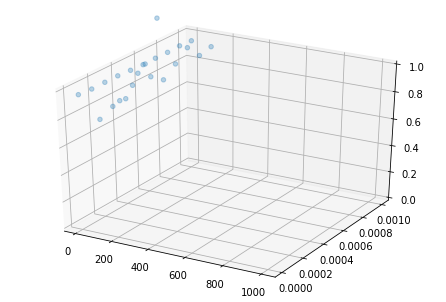

In [0]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_zlim3d(0, 1)
ax.scatter(mean_res.B, mean_res.eta, mean_res.error)
plt.show()

In [0]:
print(mean_res[mean_res.error == mean_res.error.min()])

        B      eta     error
10  120.0  0.00001  0.822314


In [0]:
def get_A_n(n):
    A_n = list()
    for i in range(n):
        if i % 2 == 0:
            A_n.append(0)
        else:
            k = n // 2
            A_n.append(2 / np.sqrt(np.pi) * ((-1) ** k) / (np.math.factorial(k) * n))
    return np.array(A_n)

In [0]:
def gen_est(W, x, y, B, A_n):
    N = int(np.ceil(4 * (B ** 2)))
    n = np.random.choice(40, p=(1 / (2 ** np.arange(1, 41))))
    d = W.shape[0]
    if n <= 2 * np.log2(N):
        probabilities = W ** 2 / (W ** 2).sum()
        try:
            chosen_indices = np.random.choice(d, size=n, p=probabilities)
        except ValueError:
            probabilities += 1 / d
            probabilities /= probabilities.sum()
            chosen_indices = np.random.choice(d, size=n, p=probabilities)
        
        Theta = (W ** 2).sum() * (x[chosen_indices] / W[chosen_indices]) - y
    else:
        probabilities = W ** 2 / (W ** 2).sum()
        try:
            chosen_indices = np.random.choice(d, size=(n, N), p=probabilities)
        except ValueError:
            probabilities += 1 / d
            probabilities /= probabilities.sum()
            chosen_indices = np.random.choice(d, size=(n, N), p=probabilities)
        
        Theta = ((W ** 2).sum() * (x[chosen_indices] / W[chosen_indices]) - y).mean(axis=1)
        
    return 2 ** (n + 1) * A_n[n] * Theta.prod()



In [0]:
def attribute_efficient_SVR(X, Y, k, B, eta, delta, epsilon):
    m = X.shape[0]
    d = X.shape[1]
    W_result = np.zeros(d)
    W = np.full(d, np.sqrt(B / (2 * d)))
    A_n = get_A_n(40)
    for t in range(m):
        observed_attributes = observe_k_attributes(X[t], k)

        x_prim = X[t] / epsilon
        y_plus = (Y[t] + delta) / epsilon
        y_minus = (Y[t] - delta) / epsilon
        
        theta = (gen_est(W, x_prim, y_plus, B, A_n) + gen_est(W, x_prim, y_minus, B, A_n)) / 2
        g = theta * observed_attributes
        v = W - eta * g

        W_result += W / m
        W = v * B / max(np.sqrt((v ** 2).sum()), B)
    return W_result

Finding out the best parameters will take much time, so I decreased the number of parts in cross validation to 3.

In [0]:
k = 50
results_svr_logspace = []

for i in range(3):
    print(i)
    train_data, train_labels, test_data, test_labels = get_train_test_cross_validation(data, labels,
                                                                                       10, i)
    for B in np.logspace(-2, 2, num=5):
        for eta in np.logspace(-6, 0, num=7):
            for delta in np.logspace(-6, 0, num=7):
                for epsilon in np.logspace(-6, 0, num=7):
                    Ws = attribute_efficient_SVR(train_data, train_labels, k, B,
                                                 eta, delta, epsilon)
                    found_labels = test_data @ Ws
                    error = ((found_labels - test_labels) ** 2).mean()
                    results_svr_logspace.append({'B': B,
                                                 'eta': eta,
                                                 'delta': delta,
                                                 'epsilon': epsilon,
                                                 'part': i,
                                                 'error': error})
results_svr_logspace_df = pd.DataFrame(results_svr_logspace)